# Creating behavior reports
will create a summary of a behavior session.

In [1]:
import json
import os
from os.path import join
from src import behavior_class as bc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [27]:
mouse_id = "140502_5"

In [28]:
behavior = bc.behaviorData(mouse_id)
behavior_folders = [
    (index, folder) for index, folder in enumerate(behavior.find_behavior_folders())
]
behavior_folders

Searching for behavior folders in /data2/gergely/invivo_DATA/sleep/140502_5
Searching for behavior folders in /data2/gergely/invivo_DATA/sleep/140502_5


[(0,
  '/data2/gergely/invivo_DATA/sleep/140502_5/1_16/TSeries-01162024-0853_dendrite-001/TSeries-01162024-0853_dendrite-001.sima/behavior'),
 (1,
  '/data2/gergely/invivo_DATA/sleep/140502_5/1_17/TSeries-01172024-0745_dendrites-001/TSeries-01172024-0745_dendrites-001.sima/behavior')]

In [34]:
folder_to_load = 1
behavior_file = "140502_5_20240117113156_937_sleep.json"

In [35]:
beh_folder = behavior_folders[folder_to_load][1]

file_path = join(beh_folder, behavior_file)
if os.path.isfile(file_path):
    print("File exists")
else:
    print(f"File {behavior_file} is not found in {file_path}")

File exists


## Summary data

In [36]:
with open(join(beh_folder, behavior_file)) as f:
    beh_data = json.load(f)

summary_dict = {
    "recording_duration": beh_data[0]["data"]["recordingDuration"],
    "number_laps": max(beh_data[0]["data"]["lap_bin"]),
    "mean_velocity": np.mean(beh_data[0]["data"]["velocity"])
    / beh_data[0]["data"]["recordingDuration"],
}
with open(join(beh_folder, "behavior_summary.json"), "w") as f:
    json.dump(summary_dict, f, indent=4)

## Summary plots

In [37]:
filtered_velocity = pd.read_json(join(beh_folder, "filtered_velocity.json"))
mob_immob = pd.read_json(join(beh_folder, "mobility_immobility.json"))

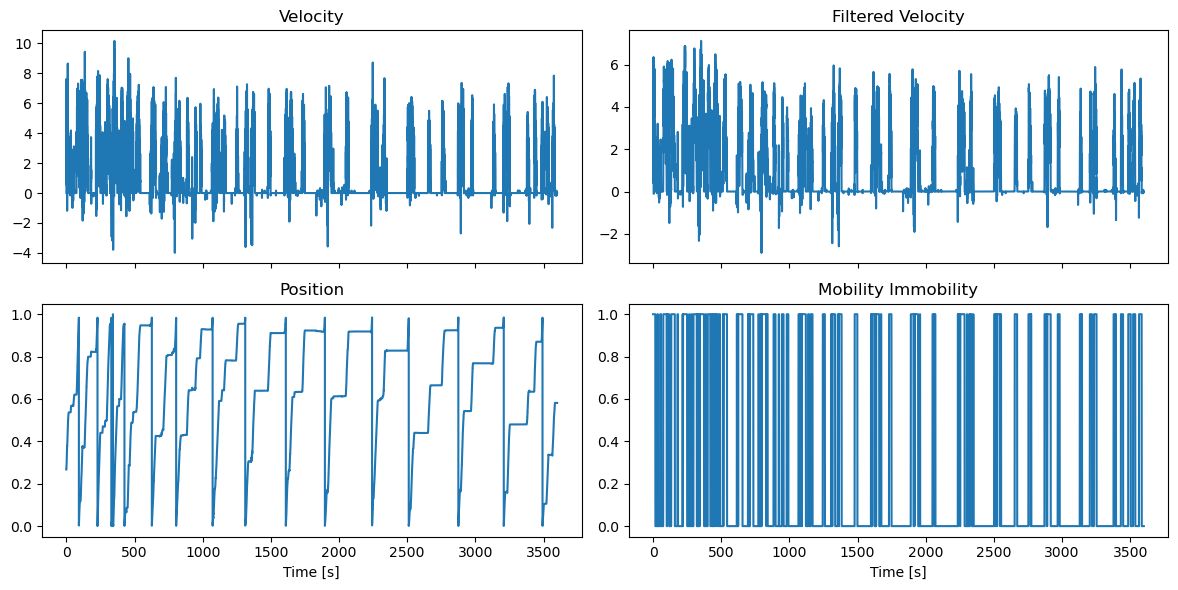

In [38]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 6), sharex=True)
duration = int(beh_data[0]["data"]["recordingDuration"])
num_data_points = len(beh_data[0]["data"]["velocity"])
x = np.linspace(0, duration, num_data_points)

# Velocity
ax[0, 0].plot(x, np.array(beh_data[0]["data"]["velocity"]))
ax[0, 0].set_title("Velocity")

# position
ax[1, 0].plot(x, np.array(beh_data[0]["data"]["treadmillPosition"]))
ax[1, 0].set_title("Position")
ax[1, 0].set_xlabel("Time [s]")

# filtered velocity
ax[0, 1].plot(x, np.array(filtered_velocity))
ax[0, 1].set_title("Filtered Velocity")

# mobility immobility
ax[1, 1].plot(x, mob_immob)
ax[1, 1].set_title("Mobility Immobility")
ax[1, 1].set_xlabel("Time [s]")

plt.tight_layout()
plt.savefig(join(beh_folder, "behavior_summary.png"))

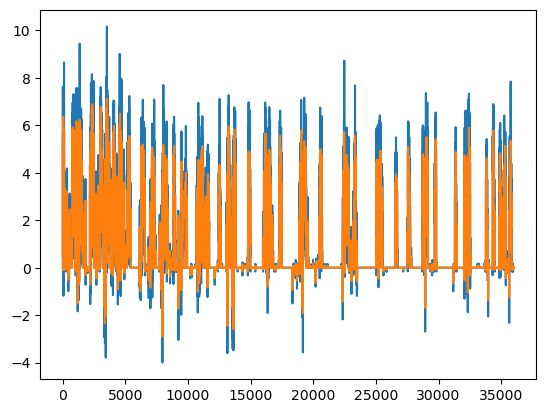

In [39]:
plt.plot(np.array(beh_data[0]["data"]["velocity"]))
plt.plot(np.array(filtered_velocity))